<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week5_%EB%B6%84%EB%A5%98_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CH4. 분류**
- 지도학습 : label 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

    -> 대표 유형 : **분류**

    : 학습 데이터의 피처와 레이블값을 학습해 모델 생성 -> 새로운 데이터 값이 주어졌을때 미지의 레이블 값 예측.

    - 나이브 베이즈
    - 로지스틱 회귀
    - 결정 트리
    - 서포트 벡터 머신
    - 최소 근접 (Nearest Neighbor) 알고리즘
    - 신경망
    - 머신러닝 알고리즘 결합한 앙상블


### "앙상블 방법"

  : 정형 데이터의 예측 분석 영역에서 높은 예측 성능 보인다.
1. 배깅 방식
  - 대표 : 랜덤 포레스트

2. 부스팅 방식
  - gradient boosting - 수행 시간이 김
  - XgBoost, LightGBM - 발전된 형태

@ 대부분 동일 알고리즘 결합

@ 결정 트리가 기본 알고리즘 -> 과적합 발생 가능

###**결정트리**
: 데이터에 있는 규칙을 학습을 통해 자동으로 찾는 트리 기반의 분류 규칙.
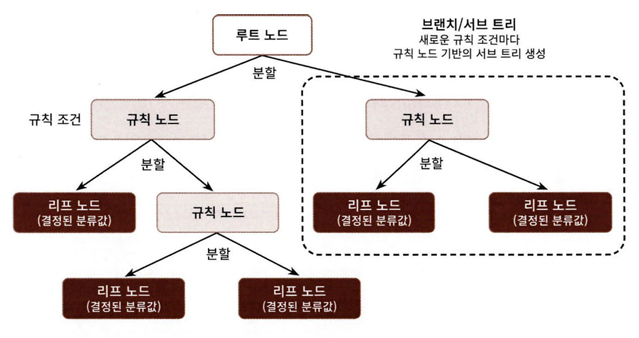

- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하
- 트리 분할 규칙이 균일한 데이터 구성을 위해 필요.


**결정노드**
- 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬.
  
  -> 조건을 찾아 서브 데이터 세트 만들고 다시 균일도 높은 자식 데이터 세트 쪼개는 방식을 반복
  
- 정보 균일도 측정 방법
  1. information gain (엔트로피 이용한 정보 이득) : 데이터 집합의 혼잡도가 높으면 엔트로피 높음
  * 1-엔트로피 = 정보 이득 => 정보 이득 높은 속성 선택
  2. 지니 계수 - 균일도가 높으면 지니 계수가 낮음 => 지니 계수 낮은 속성 선택
  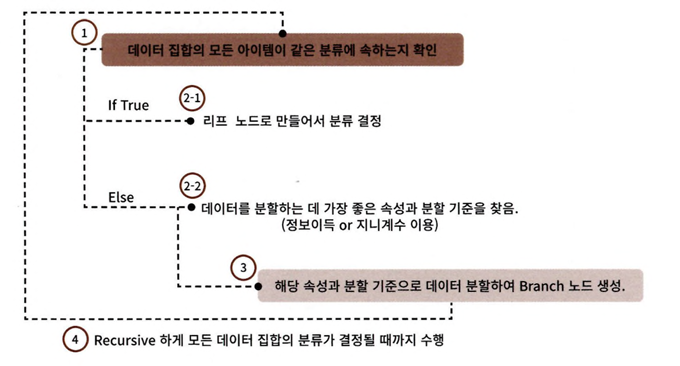

###**결정트리 모델의 특징**
[장점]
- 균일도 기반 -> 규칙 노드와 리프 노드가 만들어짐
- 피처의 스케일링과 정규화 같은 전처리 작업 필요 X

[단점]
- 과적합으로 정확도 떨어짐

**결정 트리 파라미터**
- DecisionTreeClassifier(분류) & DecisionTreeRegressor(회귀) 클래스 제공
- 파라미터
  - min_samples_split : 분할을 위한 최소한의 샘플 데이터 수 -> 과적합 제어 (작을수록 과적합)
  - min_samples_leaf : 분할 될 경우 브랜치 노드에서 가져야할 최소한의 샘플 데이터 수-> 작게 설정 필요
  - max_features : 고려할 최대 피처 개수, int 형-> 개수, float-> 대상 피처의 퍼센트
  - max_depth : 트리의 최대 깊이 -> 깊으면 과적합
  - max_leaf_nodes : 말단 노드의 최대 개수

  **결정 트리 모델의 시각화**
  

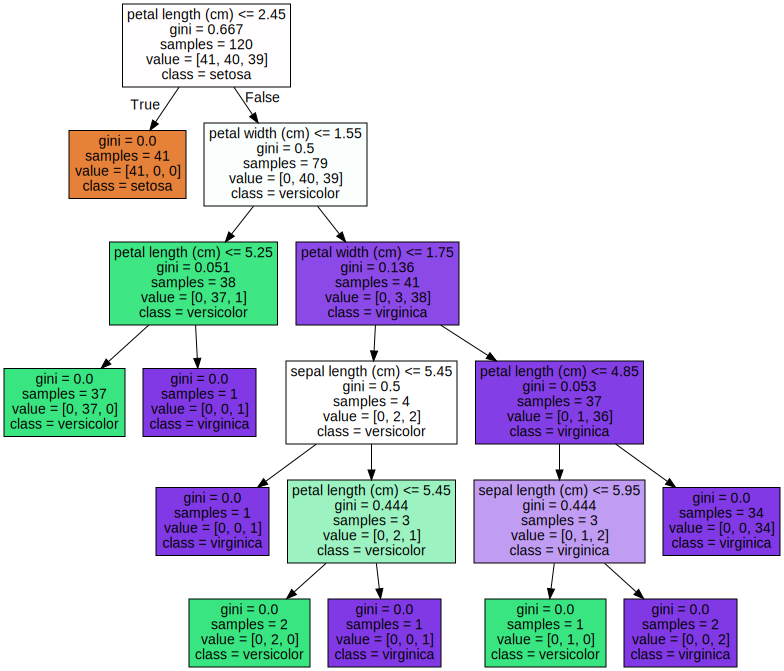

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data= load_iris()
X_train, X_test, y_train,y_test= train_test_split(iris_data.data, iris_data.target,
                                                  test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함

#인자로 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

import graphviz

#위에서 생성된 tree,dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- 더이상 자식노드가 없는 노드 = 리프 노드
  - 최종 클래스 값이 결정됨
  - 성립 조건 : 하이퍼 파라미터 조건 충족

- 자식 노드가 있는 노드 = 브랜치 노드

*1번 노드*
- samples = 120개는 전체 데이터가 120개라는 의미
- value = [41,40, 39]는 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성
- sample 120개가 value = [41, 40,39] 분포도로 되어 있으므로 지니 계수는 0.667
- petal length (cm)〈= 2.45 규칙으로 자식 노드 생성
- class = setosa는 하위 노드를 가질 경우에 setosa의 개수가 41 개로 제일 많다는 의미

*2번 노드*
- 41개 모두 Setosa, 예측 클래스도 Setosa
- 지니 계수 0 (균일함)

+ 각 노드의 색깔 = 붓꽃 데이터의 레이블 값

-> 주황색 0: Setosa / 초록색 1: Versicolor / 보라색 2: Virginica

=> 색깔 진할수록 지니 계수 낮고 해당 레이블에 속하는 샘플 데이터 많음

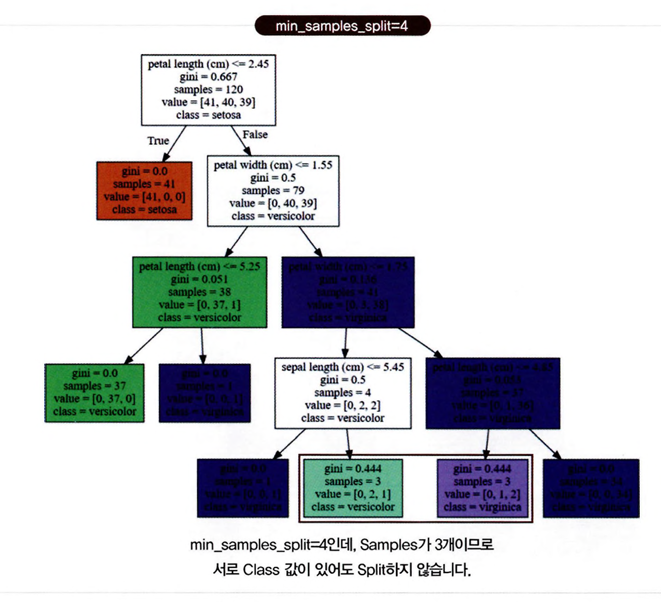

- min_samples_leaf : 왼쪽, 오른쪽 자식 노드 각각이 갖게 될 최소 데이터 건수지정
  
  -> 둘 중 하나라도 최소 개수보다 더 작은 데이터 건수를 갖게 되면 더이상 분할하지 않고 리프노드가 됨


- feature_importances_ 는 피처 순서대로 값 할당함
  - 피처가 트리 분할 시 정보이득이나 지니 계수를 얼마나 효율적으로 개선시켰는지 정규화된 값으로 표현한 것
  - 값이 높을수록 중요도 높음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

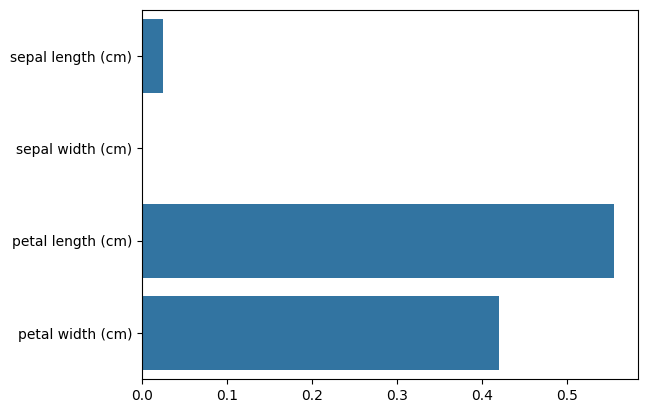

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance 를 column 별로 시각화하기
sns.barplot(x= dt_clf.feature_importances_, y= iris_data.feature_names)

## 여러 피처 중 petel_length가 가장 피처 중요도가 높음

**결정 트리 과적합(overfitting)**
- make_classification() 함수 : 분류를 위한 테스트용 데이터 만듬
  - 호출 시 피처 데이터 세트와 클래스 레이블 데이터 세트 반환

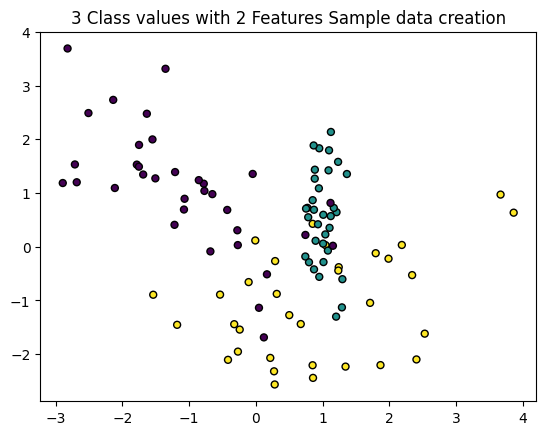

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
#redundant - 중복 피처 개수, informative - 의미있는 피처 개수, repeated - 동일한 피처 수
X_features, y_labels= make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k')

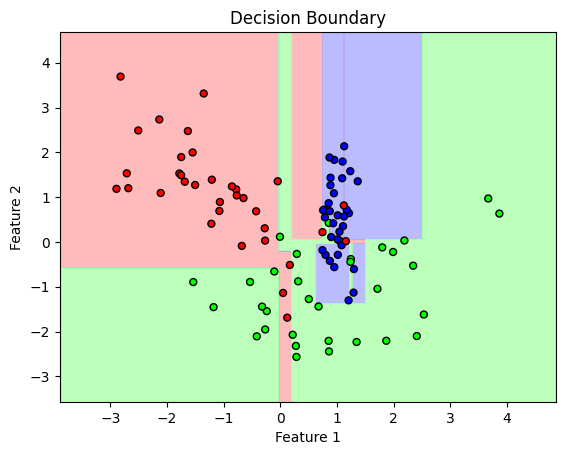

In [16]:
from sklearn.tree import DecisionTreeClassifier

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

def visualize_boundary(model, X, y):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),

                         np.arange(y_min, y_max, 0.01))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])

    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])


    plt.figure()

    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=25, edgecolor='k')

    plt.xlim(xx.min(), xx.max())

    plt.ylim(yy.min(), yy.max())

    plt.title("Decision Boundary")

    plt.xlabel("Feature 1")

    plt.ylabel("Feature 2")

    plt.show()


#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf= DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 분할이 자주 일어남 -> 경계가 매우 많아짐

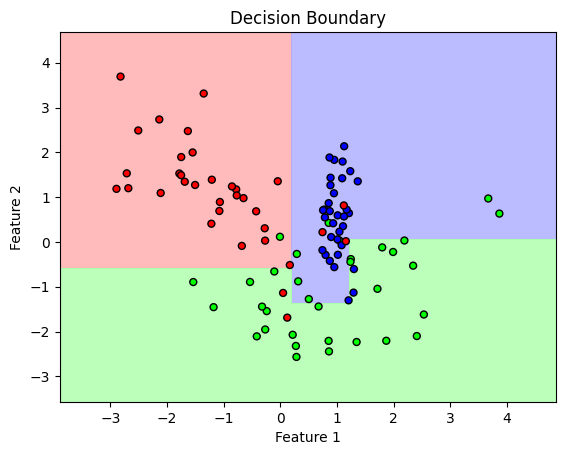

In [17]:
#min_samples_leaf= 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf= DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

**결정 트리 실습 - 사용자 행동 인식 데이터 세트**
-  30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를
수집한 데이터

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처이름 index와 피처명이 공백으로 분리되어있음.
# 이를 DataFrame으로 로드.
feature_name_df= pd.read_csv('/content/features.txt', sep="\s+",
                             header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name= feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])


전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [19]:
# 중복된 피처 알아보기
feature_dup_df= feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [20]:
#중복된 피처에 _1, _2 추가하기
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df= pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                               columns=['dup_cnt'])
  feature_dup_df= feature_dup_df.reset_index()
  new_feature_name_df= pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name']= new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                           if x[1]>0 else x[0], axis=1)
  new_feature_name_df= new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df


In [26]:
import pandas as pd

def get_human_dataset():

    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df= pd.read_csv('/content/features.txt', sep='\s+',
                                 header=None, names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df= get_new_feature_name_df(feature_name_df)

    # DateFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train= pd.read_csv("/content/X_train.txt", sep='\s+', names= feature_name)
    X_test= pd.read_csv("/content/X_test.txt", sep='\s+', names= feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/y_train.txt',sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('/content/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [28]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [30]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 # 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'. format (accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [41]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' :[ 6, 8 ,10, 12, 16 ,20, 24],
    'min_samples_split':[16]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- (GridSearchCV 객체의) cv_results_ 속성: CV세트에 하이퍼 파라미터를 순차적으로 입력했을때의 성능 수치 가짐

In [42]:
 # GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성 .
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
 # max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [43]:
max_depths= [6,8,10,12,16,20,24]

#max_depth값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth, min_samples_split=16,random_state=156)
    dt_clf.fit(X_train, y_train)
    pred= dt_clf.predict(X_test)
    accuracy= accuracy_score(y_test, pred)
    print('max_depth={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도: 0.8551
max_depth=8 정확도: 0.8717
max_depth=10 정확도: 0.8599
max_depth=12 정확도: 0.8571
max_depth=16 정확도: 0.8599
max_depth=20 정확도: 0.8565
max_depth=24 정확도: 0.8565


In [44]:
params= {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv= GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [48]:
best_dt_clf= grid_cv.best_estimator_
pred1= best_dt_clf.predict(X_test)
accuracy= accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


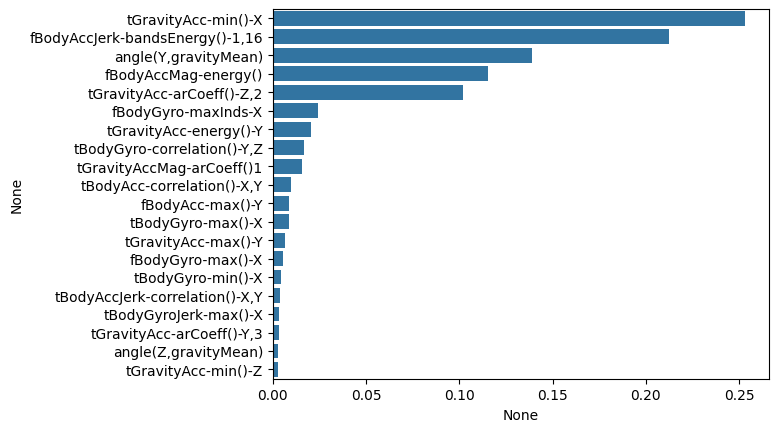

In [52]:
import seaborn as sns

ftr_importances_values= best_dt_clf.feature_importances_

#Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대 그래프로 쉽게 표현하기 위해 Series변환
ftr_importances= pd.Series(ftr_importances_values, index=X_train.columns)

#중요도 값 순으로 Series를 정렬
ftr_top20= ftr_importances.sort_values(ascending=False)[:20]
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()